In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("https://github.com/selva86/datasets/raw/master/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

#Train Test Split

In [6]:
x,tx = train_test_split(data, random_state=2529)

#Principal Component Analysis

In [7]:
lx = x[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']].values.tolist()
ntx = tx[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']].values.tolist()

scaler = StandardScaler()
scaler.fit(lx)

lx = scaler.transform(lx)
ntx = scaler.transform(ntx)

n = len(lx)
X = np.array(lx)
Xt = np.transpose(X)
E = (Xt @ X)/n
val,vect = np.linalg.eig(E)

idx = val.argsort()[::-1]
val = val[idx]
vect = vect[:, idx]
print(val)
print(np.shape(vect))

[6.12248187 1.45985708 1.25821997 0.85815729 0.79950068 0.67252958
 0.54282824 0.38054063 0.27973455 0.21792999 0.18685075 0.1611485
 0.06022086]
(13, 13)


#Least Square Approximation

In [38]:
ly = x[['medv']].values.tolist()
Y = np.zeros(n)

P = vect[:, :3]
R = X @ P
R = R.tolist()
for i in range(n):
  R[i].append(1)
  Y[i] = ly[i][0]
R = np.array(R)
Rt = np.transpose(R)
xtx = Rt @ R
xty = Rt @ Y
inx=np.linalg.inv(xtx)
C=inx @ xty

def pls(temp):
  J = np.array(temp)
  nJ = J @ P
  temp = nJ.tolist()
  temp.append(1)
  J = np.array(temp)
  return np.dot(J,C)

#Testing The Model

In [39]:
N = len(tx)
nty = tx[['medv']].values.tolist()

e=0
act = np.zeros(N)
prd = np.zeros(N)
for i in range(N):
  act[i] = nty[i][0]
  prd[i] = pls(ntx[i])
  j=act[i]-prd[i]
  e+=(j*j)

e=np.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
5.1583131755681615


#Visualization of Actual vs Predicted

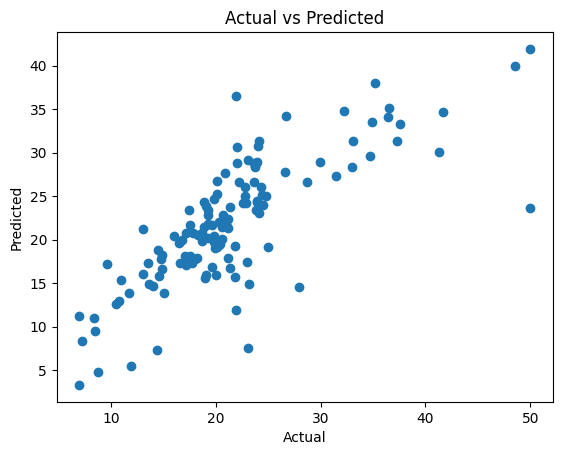

In [40]:
from matplotlib import pyplot as plt

plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()